In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_confusion_matrix, classification_report

## Data Link: https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization#


In [2]:
data = pd.read_csv("wifi_localization.txt",  delimiter = "\t", names= ['f1','f2','f3', 'f4', 'f5', 'f6', 'f7', 'class'])

In [3]:
data

,f1,f2,f3,f4,f5,f6,f7,class
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


## We don't have any column name given by the data owners. The first 7 columns are the features as these are the wifi signals recorded on a smartphone.

Target/Task: The last column that is a multiclass distribution and we need to classify those.

# Basic EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   f1      2000 non-null   int64
 1   f2      2000 non-null   int64
 2   f3      2000 non-null   int64
 3   f4      2000 non-null   int64
 4   f5      2000 non-null   int64
 5   f6      2000 non-null   int64
 6   f7      2000 non-null   int64
 7   class   2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
data.isna().sum()

f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
class    0
dtype: int64

In [6]:
data['class'].unique()

array([1, 2, 3, 4])

In [7]:
data['class'].value_counts()

4    500
3    500
2    500
1    500
Name: class, dtype: int64

In [8]:
def preprocess_inputs(df):
  df = df.copy()

  # X and y
  X = df.drop("class", axis=1)
  y = df['class']

  #split
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

  #scaling the data
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = pd.DataFrame(scaler.transform(X_train), index= X_train.index, columns = X_train.columns)
  X_test = pd.DataFrame(scaler.transform(X_test), index= X_test.index, columns = X_test.columns)
  return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [10]:
X_train

,f1,f2,f3,f4,f5,f6,f7
1194,0.221539,0.756943,0.559164,-0.115123,-0.586910,0.451633,-0.663968
45,-1.413721,-0.725598,-1.887179,-1.176046,-2.249319,-1.245159,-0.663968
1477,0.403234,0.460435,0.370984,0.238518,0.188881,0.605887,0.256384
1293,0.312387,-0.132582,0.747344,-0.026713,-0.254428,0.297379,0.563167
1736,-0.505243,-0.132582,-0.193557,-0.910815,1.407981,-0.165382,-0.817360
...,...,...,...,...,...,...,...
1791,-1.686265,-1.022106,0.559164,-0.733995,1.629636,-1.553667,-0.203792
1096,0.584930,-0.429090,0.559164,0.945800,-0.697737,-0.782398,-0.510576
1932,-0.505243,-0.132582,0.559164,-0.380354,1.629636,-0.936652,-0.510576
235,-0.596091,0.460435,-1.510818,-1.618097,-1.362701,-0.011128,0.563167


In [11]:
X_test

,f1,f2,f3,f4,f5,f6,f7
674,1.220864,-0.132582,0.370984,0.415339,-0.808564,0.143126,1.023343
1699,-0.868635,-0.725598,1.123705,-0.910815,2.294600,-0.782398,-1.124143
1282,-0.051005,0.756943,0.935524,-0.115123,0.410536,-0.782398,0.102992
1315,0.494082,-0.429090,-0.381737,0.150108,0.078054,-0.782398,-0.357184
1210,0.312387,-1.022106,-0.381737,0.326929,-1.030219,0.143126,-1.430927
...,...,...,...,...,...,...,...
1382,0.039843,0.460435,1.123705,0.150108,0.521363,-0.011128,-0.050400
1371,0.403234,0.460435,-0.193557,0.415339,-0.365255,-0.011128,0.256384
854,1.493408,-1.318614,-0.381737,1.476262,-1.916837,1.377157,1.483519
995,0.494082,-1.318614,-0.193557,0.503749,-2.470973,-0.628144,0.102992


In [12]:
y_train

1194    3
45      1
1477    3
1293    3
1736    4
       ..
1791    4
1096    3
1932    4
235     1
1061    3
Name: class, Length: 1400, dtype: int64

## Training

In [13]:
logreg = LogisticRegression()
clf = logreg.fit(X_train, y_train)

In [14]:
score = clf.score(X_test, y_test)

In [15]:
print("Score:", np.round(score*100), "%")

Score: 98.0 %


In [16]:
y_pred = clf.predict(X_test)
y_pred

array([2, 4, 3, 3, 3, 4, 2, 1, 3, 3, 3, 3, 4, 3, 1, 4, 2, 3, 2, 3, 1, 4,
       4, 2, 2, 1, 4, 1, 2, 1, 4, 2, 4, 2, 2, 2, 2, 1, 2, 4, 1, 1, 3, 3,
       3, 4, 2, 4, 4, 4, 4, 3, 3, 1, 2, 2, 2, 2, 4, 3, 1, 1, 3, 3, 3, 2,
       3, 2, 2, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 1, 2, 1, 1, 3, 3, 2, 1,
       1, 1, 1, 2, 1, 4, 4, 2, 3, 3, 2, 1, 4, 1, 2, 1, 2, 4, 4, 3, 2, 3,
       2, 1, 3, 4, 1, 2, 2, 3, 4, 3, 3, 3, 4, 3, 2, 3, 4, 3, 4, 2, 3, 2,
       2, 1, 2, 3, 4, 1, 4, 1, 3, 1, 4, 3, 2, 3, 3, 4, 3, 4, 2, 1, 4, 3,
       1, 4, 4, 4, 2, 3, 3, 4, 3, 2, 1, 4, 1, 1, 3, 2, 2, 3, 1, 4, 1, 2,
       2, 2, 2, 3, 2, 4, 2, 4, 3, 4, 3, 3, 1, 2, 1, 4, 3, 4, 1, 1, 1, 1,
       2, 2, 2, 3, 4, 4, 4, 2, 3, 4, 3, 2, 4, 4, 1, 2, 2, 1, 2, 1, 4, 2,
       3, 4, 3, 1, 4, 1, 2, 3, 1, 4, 3, 4, 4, 2, 1, 3, 2, 3, 3, 4, 4, 2,
       2, 4, 1, 1, 3, 2, 4, 4, 1, 1, 3, 4, 4, 3, 3, 4, 2, 1, 3, 4, 1, 4,
       4, 3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 4, 1, 3, 1, 4, 2, 4, 3, 3,
       4, 1, 3, 3, 3, 1, 4, 2, 4, 1, 2, 2, 3, 1, 1,

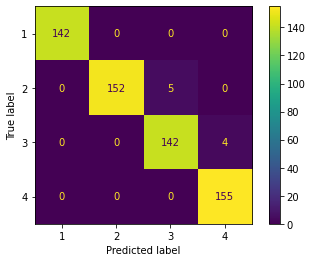

In [17]:
plot_confusion_matrix(clf, X_test, y_test, labels= clf.classes_)

In [18]:
clr = classification_report(y_test, y_pred, labels= clf.classes_)
print(clr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       142
           2       1.00      0.97      0.98       157
           3       0.97      0.97      0.97       146
           4       0.97      1.00      0.99       155

    accuracy                           0.98       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.98      0.99       600



# Using Sklearn's Pipeline

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
model = Pipeline(steps=[
                        ("scaler", StandardScaler()),
                        ("logreg", LogisticRegression())
])

In [21]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

In [22]:
score = model.score(X_test, y_test)

In [23]:
print("Score:", np.round(score*100), "%")

Score: 98.0 %


# Using PyCaret

In [24]:
!pip install pycaret

In [25]:
import pycaret.classification as pyc

In [26]:
pyc.setup(
    data= data,
    target = 'class',
    train_size=0.7,
    normalize = True
)

,Description,Value
0,session_id,3405
1,Target,class
2,Target Type,Multiclass
3,Label Encoded,"1: 0, 2: 1, 3: 2, 4: 3"
4,Original Data,"(2000, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


(None,
 Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False),
 [],
 3405,
 '7338',
 False,
 False,
 False,
 {'USI',
  'X',
  'X_test',
  'X_train',
  '_all_metrics',
  '_all_models',
  '_all_models_internal',
  '_available_plots',
  '_gpu_n_jobs_param',
  '_internal_pipeline',
  '_ml_usecase',
  'create_model_container',
  'data_before_preprocess',
  'display_container',
  'exp_name_log',
  'experiment__',
  'fix_imbalance_method_param',
  'fix_imbalance_param',
  'fold_generator',
  'fold_groups_param',
  'fold_param',
  'fold_shuffle_param',
  'gpu_param',
  'html_param',
  'imputation_classifier',
  'imputation_regressor',
  'iterative_imputation_iters_param',
  'log_plots_param',
  'logging_param',
  'master_model_container',
  'n_jobs_param',
  'prep_pipe',
  'pycaret_globals',
  'seed',
  'stratify_param',
  'target_param',
  'transform_target_method_param',
  'transform_target_param',
  'y',
  'y_test',
  'y_train'},
 'clf-default-name',
 'box-cox',
 {'Bag

In [27]:
pyc.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9821,0.9995,0.9821,0.9830,0.9821,0.9762,0.9765,0.471
nb,Naive Bayes,0.9800,0.9984,0.9798,0.9808,0.9800,0.9733,0.9736,0.020
qda,Quadratic Discriminant Analysis,0.9779,0.9987,0.9779,0.9786,0.9779,0.9705,0.9707,0.022
rf,Random Forest Classifier,0.9771,0.9990,0.9770,0.9780,0.9771,0.9695,0.9698,0.519
lr,Logistic Regression,0.9764,0.9989,0.9764,0.9779,0.9765,0.9686,0.9690,0.302
knn,K Neighbors Classifier,0.9757,0.9971,0.9756,0.9769,0.9758,0.9676,0.9680,0.121
lightgbm,Light Gradient Boosting Machine,0.9757,0.9989,0.9757,0.9766,0.9757,0.9676,0.9679,0.258
gbc,Gradient Boosting Classifier,0.9750,0.9987,0.9749,0.9757,0.9750,0.9666,0.9669,0.680
lda,Linear Discriminant Analysis,0.9664,0.9981,0.9661,0.9706,0.9668,0.9552,0.9565,0.021
svm,SVM - Linear Kernel,0.9650,0.0000,0.9651,0.9667,0.9648,0.9533,0.9540,0.064


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3405, verbose=0,
                     warm_start=False)

In [28]:
best_model = pyc.create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9643,0.9991,0.9636,0.9667,0.9642,0.9523,0.9532
1,0.9714,0.9991,0.9722,0.9734,0.9711,0.9619,0.9628
2,0.9929,0.9999,0.9931,0.9931,0.9929,0.9905,0.9905
3,0.9786,0.9997,0.9782,0.9795,0.9786,0.9714,0.9717
4,0.9929,1.0000,0.9929,0.9931,0.9929,0.9905,0.9905
5,0.9929,0.9997,0.9929,0.9931,0.9929,0.9905,0.9905
6,0.9714,0.9984,0.9714,0.9718,0.9713,0.9619,0.9621
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9643,0.9991,0.9639,0.9660,0.9645,0.9524,0.9528
9,0.9928,1.0000,0.9931,0.9930,0.9928,0.9904,0.9905


In [29]:
pyc.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…